In [1]:
import darknet_yolo as dyolo

In [2]:
from keras.preprocessing.image import load_img, img_to_array

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
yolo_model = dyolo.yolo_model('yolov3.weights','yolo_model.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [5]:
len(dyolo.labels)

80

In [6]:
for i in dyolo.labels:
    print(i,' ',end='')

person  bicycle  car  motorbike  aeroplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  sofa  pottedplant  bed  diningtable  toilet  tvmonitor  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush  

In [55]:
imgs = ['computer.jpg','kites.jpg','person with dog.jpg','buildings.jpg','car.jpg']

In [56]:
import matplotlib.pyplot as plt

In [57]:
from skimage.transform import resize

In [58]:
from numpy import expand_dims

In [59]:
w,h=416,416

In [60]:
def preprocess_image(im, shape):
    img = load_img(im)
    width, height = img.size
    
    img = load_img(im, target_size=shape)
    img = img_to_array(img)
    img = img.astype('float32')
    img /= 255    
    img = expand_dims(img,0)    
    return img, width,height

In [70]:
ind = 4

In [71]:
image,width,height = preprocess_image(imgs[ind],(w,h))

In [72]:
(yhat, (boxes, pred, conf)) = dyolo.prediction(yolo_model, image, width, height)

In [73]:
boxes

In [74]:
pred

['car']

In [75]:
conf

[99.59376454353333]

In [76]:
len(yhat)

3

In [77]:
yhat[0].shape

(1, 13, 13, 255)

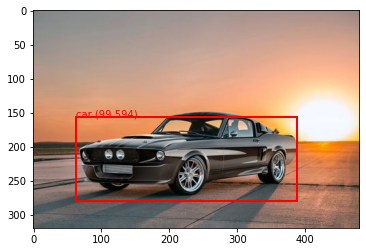

In [78]:
dyolo.draw_boxes(imgs[ind], boxes, pred, conf)